# Módulo de Programação Python

# Trilha Python - Aula 2X: Requests

<img align="center" style="padding-right:10px;" src="Figuras/aula-25_fig_01.png">

## Pegando os dados direto da Internet, continuação

Na aula anterior vimos como usar o __Requests__ para implementar códigos que intergem com servidores __WEB__ utilizando o protocolo __HTTP__. 

Entretanto o resultado obtido, utilizando apenas o __Requests__, é bastante limitado. O atributo ``text`` dos objetos da classe ``Response``fornecem ums string (``str``) que precisaria de um processamento mais detalhado para conseguir alguma informação util. 

Hoje vamos utilizar alguns pacotes adicionais para extrair informações relevantes destas requisições. 

### Uma pesquisa simples no google

Se for realizada uma pesquisa no [Google](www.google.coom) por um termo qualquer podemos entender melhor como este tipo de requisição funciona. 

Uma vez rquisitada a pesquisa pelo _browser_, o mesmo nos direciona a uma página com o seguinte endereço. 

``https://www.google.com/search?q=python+requests+get&client=safari&sca_esv=7c657d381c876d41&source=hp&ei=xYLCZf2XJ6jY1sQPu9iGiAM&iflsig=ANes7DEAAAAAZcKQ1daKL8-uhrg7eF1PsoSKaKiVZG5y&udm=&oq=python+requests&gs_lp=Egdnd3Mtd2l6Ig9weXRob24gcmVxdWVzdHMqAggCMggQABiABBixAzIFEAAYgAQyBRAAGIAEMgUQABiABDIFEAAYgAQyBRAAGIAEMgUQABiABDIFEAAYgAQyBRAAGIAEMgUQABiABEj_aVDNGlj1UHACeACQAQCYAbUBoAG5EqoBBDAuMTa4AQHIAQD4AQGoAgrCAhAQABgDGI8BGOUCGOoCGIwDwgIQEC4YAxiPARjlAhjqAhiMA8ICDhAAGIAEGIoFGLEDGIMBwgILEAAYgAQYsQMYgwHCAgsQLhiABBixAxiDAcICDhAuGIAEGIoFGLEDGIMBwgILEC4YgAQYsQMY1ALCAggQLhiABBjUAsICDRAuGIAEGAoYsQMYgwHCAgUQLhiABMICBBAAGAPCAhAQABiABBgNGLEDGLEDGIMBwgIHEAAYgAQYDQ&sclient=gws-wiz``

Repare que este endereço tem uma serie de informações entre as quais pode ser identificado, por exemplo, os termos pesquisados e o navegador desde onde a requisição foi realizada. 

Tente colocar no seu _browser_ apenas ``https://www.google.com/search?q=python+requests+get`` e veja o que acontece.

Podemos então tentar fazer uso do __Requests__ para fazer a mesma requisição.

In [1]:
import requests

url = 'https://www.google.com/search?q=python+requests+get'

response = requests.get(url)

# ou poderia ser

#url = 'https://www.google.com/search'
#params = {'q': 'python requests get'}
#response = requests.get(url, params=params)

print(response.status_code)

200


Agora podemos dar uma revisada no objeto ``Response``que foi retornado com sucesso.

<!doctype html><html lang="pt-BR"><head><meta charset="UTF-8"><meta content="AmFMpMe9tdD7tYHZ5DTQG/aRAYYkWIQDI/+Hwz5Y7OagTtDB3LA01RMKTpQ8jCqukCmZ7HDuCpEwx7WwAiFBywoAAAByeyJvcmlnaW4iOiJodHRwczovL2dvb2dsZS5jb20uYnI6NDQzIiwiZmVhdHVyZSI6IkxvbmdBbmltYXRpb25GcmFtZVRpbWluZyIsImV4cGlyeSI6MTcwOTY4MzE5OSwiaXNTdWJkb21haW4iOnRydWV9" http-equiv="origin-trial"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>python requests get - Pesquisa Google</title><script nonce="FbCAWDIfWwIFSu3E7fUq4Q">(function(){
document.documentElement.addEventListener("submit",function(b){var a;if(a=b.target){var c=a.getAttribute("data-submitfalse");a="1"===c||"q"===c&&!a.elements.q.value?!0:!1}else a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var a;a:{for(a=b.target;a&&a!==document.documentElement;a=a.parentElement)if("A"===a.tagName){a="1"===a.getAttribute("data-nohref");break a}a=!1}a&&b.preventDefa
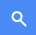

In [2]:
print(response.text)

Complexo!!!

Vamos então utilizar um outro recurso importante: o pacote __Beautiful Soup__


### Beautiful Soup

__Beautiful Soup__ é uma biblioteca __Python__ para extrair dados de arquivos __HTML__ e __XML__. Uma documentação detalhada deste pacote pode ser encontrada [aqui](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)

No desenvolvimento web, "sopa de tags" (_tag soup_) é um pejorativo para o código __HTML__ sintaticamente ou estruturalmente incorreto escrito para uma página web. Como os navegadores da Web têm historicamente tratado erros estruturais ou de sintaxe em __HTML__ com tolerância, tem havido pouca pressão para que os desenvolvedores da Web sigam os padrões publicados e, portanto, há uma necessidade de todas as implementações de navegador fornecerem mecanismos para lidar com o aparecimento de "sopa de tags" , aceitando e corrigindo sintaxe e estrutura inválidas sempre que possível.

Vamos mostrar utilizando exemplos algumas funcionalidades deste recurso.


In [3]:
#pip install bs4
from bs4 import BeautifulSoup

busca = BeautifulSoup(response.text, 'html.parser')
type(busca)

bs4.BeautifulSoup

<!DOCTYPE html>
<html lang="pt-BR">
 <head>
  <meta charset="utf-8"/>
  <meta content="AmFMpMe9tdD7tYHZ5DTQG/aRAYYkWIQDI/+Hwz5Y7OagTtDB3LA01RMKTpQ8jCqukCmZ7HDuCpEwx7WwAiFBywoAAAByeyJvcmlnaW4iOiJodHRwczovL2dvb2dsZS5jb20uYnI6NDQzIiwiZmVhdHVyZSI6IkxvbmdBbmltYXRpb25GcmFtZVRpbWluZyIsImV4cGlyeSI6MTcwOTY4MzE5OSwiaXNTdWJkb21haW4iOnRydWV9" http-equiv="origin-trial"/>
  <meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"/>
  <title>
   python requests get - Pesquisa Google
  </title>
  <script nonce="FbCAWDIfWwIFSu3E7fUq4Q">
   (function(){
document.documentElement.addEventListener("submit",function(b){var a;if(a=b.target){var c=a.getAttribute("data-submitfalse");a="1"===c||"q"===c&&!a.elements.q.value?!0:!1}else a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var a;a:{for(a=b.target;a&&a!==document.documentElement;a=a.parentElement)if("A"===a.tagName){a="1"===a.getAttribute("data-nohref
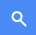

In [4]:
print(busca.prettify())

Antes de continuar vamos dar uma olhada em que significam as marcações utilizadas neste documentos 

### Revisão rápida de HTML

__HTML__ significa _HyperText Markup Language_ procurar definição mais apropriada para colocar aqui.

Os _tags_ utilizados em __HTML__ são delimitados por ``<``e ``/ >`` e são usados para descrever os elementos por eles delimitados. 

Os tags mas utilizados estão descritos na tabela a seguir:


| Tag         | Tipo           | O que ele faz|
| ------------| -------------- | -------------|
| ``<p> </p>``    | HTML Text Tags | Paragraph    |
| ``<h1> </h1>``  | HTML Text Tags | Heading 1    |
| ``<h2> </h2>``  | HTML Text Tags | Heading 2    |
| ``<h3> </h3>``  | HTML Text Tags | Heading 3    |
| ``<h4> </h4>``  | HTML Text Tags | Heading 4    |
| ``<h5> </h5>``  | HTML Text Tags | Heading 5    |
| ``<h6> </h6>``  | HTML Text Tags | Heading 6    |
| ``<strong>``    | HTML Text Tags | Strong       |
| ``<em>``        | HTML Text Tags | Emphasis     |
| ``<abbr>``      | HTML Text Tags | Abbreviation |
| ``<address>``   | HTML Text Tags | Contact Information |
| ``<bdo>``       | HTML Text Tags | Override The Current Text Direction |
| ``<blockquote>``| HTML Text Tags | Content From Another Source |
| ``<cite>``      | HTML Text Tags | Title Of The Work, Book, Website |
| ``<q>``         | HTML Text Tags | Inline Quotation |
| ``<code>``      | HTML Text Tags | Display A Part Of Programming Code |
| ``<ins>``       | HTML Text Tags | Text Inserted |
| ``<del>``       | HTML Text Tags | Text Deleted From The Document |
| ``<dfn>``       | HTML Text Tags | Term Defined Within A Sentence/Phrase |
| ``<kbd>``       | HTML Text Tags | Keyboard Input |
| ``<pre>``       | HTML Text Tags | Preformatted Text |
| ``<samp>``     | HTML Text Tags | Sample Output Of A Computer Program |
| ``<var>``       | HTML Text Tags | Variable Name Used In Mathematical Or Programming  Context |
| ``<br>``        | HTML Text Tags | Single Line Break |
| ``<div>``       | HTML Text Tags | Division |
| ``<a>``         | HTML Link Tags | Anchor Tag For A Link |
| ``<base>``      | HTML Link Tags | Base Url For All Relative Url Within The Document |
| ``<img>``       | HTML Image And Object Tags | Image |
| ``<area>``      | HTML Image And Object Tags | Area Of An Image Map |
| ``<map>``       | HTML Image And Object Tags | Image Map |
| ``<param>``     | HTML Image And Object Tags | Parameter For An <Object> Element |
| ``<object>``    | HTML Image And Object Tags | Embed An Object |
| ``<ul>``        | HTML List Tags | Unordered List |
| ``<ol>``        | HTML List Tags | Ordered List |
| ``<li>``        | HTML List Tags | List |
| ``<dl>``        | HTML List Tags | Description List |
| ``<dt>``        | HTML List Tags | Term In Description List|
| ``<dd>``        | HTML List Tags | Definition/Description Of A Term In Description List |


Veja um exemplo do uso de alguns destes tags na pasta de exemplos.

# Navegando com Soup 

As tags podem conter strings e mais tags. Esses elementos são os filhos da tag. __Beautiful Soup__ fornece muitos atributos diferentes para navegar e iterar nos filhos de uma tag.

Observe que as strings Beautiful Soup não suportam nenhum desses atributos, porque uma string não pode ter filhos.

'<head>\n <meta charset="utf-8"/>\n <meta content="AmFMpMe9tdD7tYHZ5DTQG/aRAYYkWIQDI/+Hwz5Y7OagTtDB3LA01RMKTpQ8jCqukCmZ7HDuCpEwx7WwAiFBywoAAAByeyJvcmlnaW4iOiJodHRwczovL2dvb2dsZS5jb20uYnI6NDQzIiwiZmVhdHVyZSI6IkxvbmdBbmltYXRpb25GcmFtZVRpbWluZyIsImV4cGlyeSI6MTcwOTY4MzE5OSwiaXNTdWJkb21haW4iOnRydWV9" http-equiv="origin-trial"/>\n <meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"/>\n <title>\n  python requests get - Pesquisa Google\n </title>\n <script nonce="FbCAWDIfWwIFSu3E7fUq4Q">\n  (function(){\ndocument.documentElement.addEventListener("submit",function(b){var a;if(a=b.target){var c=a.getAttribute("data-submitfalse");a="1"===c||"q"===c&&!a.elements.q.value?!0:!1}else a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var a;a:{for(a=b.target;a&&a!==document.documentElement;a=a.parentElement)if("A"===a.tagName){a="1"===a.getAttribute("data-nohref");break a}a=!1}a&&b.preventDefault
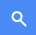

In [18]:
busca.find('head').prettify()

'<head>\n <meta charset="utf-8"/>\n <meta content="AmFMpMe9tdD7tYHZ5DTQG/aRAYYkWIQDI/+Hwz5Y7OagTtDB3LA01RMKTpQ8jCqukCmZ7HDuCpEwx7WwAiFBywoAAAByeyJvcmlnaW4iOiJodHRwczovL2dvb2dsZS5jb20uYnI6NDQzIiwiZmVhdHVyZSI6IkxvbmdBbmltYXRpb25GcmFtZVRpbWluZyIsImV4cGlyeSI6MTcwOTY4MzE5OSwiaXNTdWJkb21haW4iOnRydWV9" http-equiv="origin-trial"/>\n <meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"/>\n <title>\n  python requests get - Pesquisa Google\n </title>\n <script nonce="FbCAWDIfWwIFSu3E7fUq4Q">\n  (function(){\ndocument.documentElement.addEventListener("submit",function(b){var a;if(a=b.target){var c=a.getAttribute("data-submitfalse");a="1"===c||"q"===c&&!a.elements.q.value?!0:!1}else a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var a;a:{for(a=b.target;a&&a!==document.documentElement;a=a.parentElement)if("A"===a.tagName){a="1"===a.getAttribute("data-nohref");break a}a=!1}a&&b.preventDefault
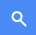

In [19]:
# ou simplesmente
busca.head.prettify()

In [20]:
busca.head.title

<title>python requests get - Pesquisa Google</title>

In [22]:
body = busca.body
body.contents[0]

<header id="hdr"><script nonce="FbCAWDIfWwIFSu3E7fUq4Q">(function(){
var k=this||self,l=function(a){var b=typeof a;return"object"==b&&null!=a||"function"==b},m=function(a,b){function c(){}c.prototype=b.prototype;a.j=b.prototype;a.prototype=new c;a.prototype.constructor=a;a.l=function(d,e,f){for(var g=Array(arguments.length-2),h=2;h<arguments.length;h++)g[h-2]=arguments[h];return b.prototype[e].apply(d,g)}};var n=Array.prototype.indexOf?function(a,b){return Array.prototype.indexOf.call(a,b,void 0)}:function(a,b){if("string"===typeof a)return"string"!==typeof b||1!=b.length?-1:a.indexOf(b,0);for(var c=0;c<a.length;c++)if(c in a&&a[c]===b)return c;return-1};var p=function(a){return"string"==typeof a.className?a.className:a.getAttribute&&a.getAttribute("class")||""},q=function(a,b){"string"==typeof a.className?a.className=b:a.setAttribute&&a.setAttribute("class",b)},r=function(a,b){a.classList?b=a.classList.contains(b):(a=a.classList?a.classList:p(a).match(/\S+/g)||[],b=0<=n(a,b));return b

In [23]:
body.contents[0].name

'header'

O próprio objeto __BeautifulSoup__ tem filhos, que são as tags contidos nele. Nesse caso, a tag <header> é filha do objeto BeautifulSoup.

### Criando um extrator de notícias

Vamos trabalhar um exemplo mais simples baseado num extrator de notícias, com base nas publicações de um site. Utilizaremos para esta finalidade o [G1](https://g1.globo.com/)

In [5]:
url = 'https://g1.globo.com/'
linkNoticias = requests.get(url)
print(linkNoticias.status_code)

200


In [6]:
linkNoticias = BeautifulSoup(linkNoticias.text, 'html.parser')
print(linkNoticias.prettify()) 

<!DOCTYPE HTML>
<html class="" lang="pt-br">
 <head>
  <meta charset="utf-8"/>
  <meta content="ie=edge,chrome=1" http-equiv="x-ua-compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <script id="CDA_AAS" type="text/javascript">
   window.cdaaas = window.cdaaas || {};
  window.cdaaas.SETTINGS = window.cdaaas.SETTINGS || {};
  window.cdaaas.PAGE_ANALYTICS_DATA = {"channel":"desktop","contentId":"ba3c5a72-7ed9-482e-be26-ee3d81c97bce","contentType":"home","serviceWorker":true};
  window.cdaaas.helpers = window.cdaaas.helpers || {};
  window.cdaaas.internals = {};
  window.HorizonClient = new Promise((resolve, reject) => { 
    window.cdaaas.internals.resolveHorizonPromise = resolve; 
    window.cdaaas.internals.rejectHorizonPromise = reject; 
  });

  window.HorizonHelpers = {
    unloadCallbacks: [],
  };

  window.cdaaas.featureFlags = [];
  window.cdaaas.hasFF = (ff) => window.cdaaas.featureFlags.includes(ff);

  window.glbDebug = window.cdaaas.debugg

In [7]:
noticia = linkNoticias.find('div', class_='_evt')
print(noticia.prettify())

<div class="_evt">
 <div class="bstn-fd bstn-fd-ssr bstn-fd-recommended">
  <div class="post-notifier-pushstream gui-color-primary-bg bstn-fd-visible-top">
  </div>
  <div class="_evg">
   <div class="_evt">
    <div class="bastian-page" data-index="1">
     <div class="_evg">
      <div class="_evt">
       <div class="bastian-feed-item" data-index="1">
        <div class="feed-post bstn-item-shape type-materia" id="049b1748-8d79-412b-8d99-b1b9f8161f18">
         <div class="feed-post-body">
          <div class="feed-post-header with-post-chapeu">
           <span class="feed-post-header-chapeu">
            Blog da Julia Duailibi
           </span>
          </div>
          <div class="feed-post-body-title gui-color-primary gui-color-hover">
           <div class="_evt">
            <h2>
             <a class="feed-post-link gui-color-primary gui-color-hover" href="https://g1.globo.com/politica/blog/julia-duailibi/post/2024/02/06/governo-publica-mp-e-isenta-do-ir-quem-ganha-ate-doi

In [8]:
titulos = noticia.find_all('p')
#print(titulo.prettify())
for titulo in titulos:
    print(titulo.text)

Governo publica medida que isenta do IR quem ganha até 2 salários mínimos
Norma deve beneficiar 15,8 milhões de pessoas. 
O ASSUNTO: brasileiro relata o horror dos incêndios mortais no Chile
Polícia prende 5º suspeito de sequestrar Marcelinho Carioca e amiga
Caso João Paulo: o que os laudos apontaram sobre a morte; OUÇA
'Enem dos concursos': confira todas as cidades com vagas
Prazo para participar da lista de espera do Sisu termina hoje
Por que Taylor ameaça processar jovem que monitora voos de seu jatinho


### Produtos do Mercado livre

Agora vamos fazer uma outra pesquisa. Desta vez vamos usar a ferramenta de busca do [Mercado Libre](https://www.mercadolivre.com.br/). 

Repare na busca por um Copo Stanley Original. Uma vez inserido o termo de busca e feita a requisição, so servidor nos direciona para o seguinte endereço. 

``https://lista.mercadolivre.com.br/copo-stanley-original#D[A:copo%20stanley%20original]```

Repare que se apagamos todos os caracteres estranhos no final da __URL__ e recarregamos a página ainda continua carregando os mesmos resultados. 

``https://lista.mercadolivre.com.br/copo-stanley-original```

Mais ainda, se colocamos o a __URL__ com os termos da busca separados:

``https://lista.mercadolivre.com.br/copo stanley original``

O servidor retorna para mesma página.

Então podemos utilizar esta __URL__ para fazer a requisição. 

In [9]:
url = "https://lista.mercadolivre.com.br/copo-stanley-original"
#ou
#url = https://lista.mercadolivre.com.br/
# produto = input('Digite o produto que deseja pesquisar: ')
# url = url + produto
response = requests.get(url)
print(response.status_code)

200


Novamente vamos utilizar o Beautiful Soup para extrair os produtos que foram retornados.

In [10]:
linkPesquisa = BeautifulSoup(response.text, 'html.parser')
print(linkPesquisa.prettify())

<!DOCTYPE html>
<html lang="pt-BR">
 <head>
  <link href="https://www.google-analytics.com" rel="preconnect"/>
  <link href="https://www.google.com" rel="preconnect"/>
  <link href="https://data.mercadolibre.com" rel="preconnect"/>
  <link href="https://http2.mlstatic.com" rel="preconnect"/>
  <link href="https://stats.g.doubleclick.net" rel="preconnect"/>
  <link href="https://analytics.mercadolivre.com.br" rel="preconnect"/>
  <link href="https://analytics.mercadolivre.com" rel="preconnect"/>
  <link href="https://www.google.com.br" rel="preconnect"/>
  <script nonce="anBpWhyVBGJlMlv+Pk5NmQ==" type="text/javascript">
   window.NREUM||(NREUM={});NREUM.info = {"agent":"","beacon":"bam.nr-data.net","errorBeacon":"bam.nr-data.net","licenseKey":"NRBR-766f4fb616d3a2368ce","applicationID":"1729522169","agentToken":null,"applicationTime":768.981329,"transactionName":"bgQDMEcFXkJZBkYNWldOJBxFFlVCSw9BS3J8NU5LHw==","queueTime":0,"ttGuid":"8fc06483eb56e648"}; (window.NREUM||(NREUM={})).init={pri

In [11]:
#<div class="ui-search-result__wrapper">
item = linkPesquisa.find('div', class_='ui-search-result__wrapper')
#print(item.prettify())
#podemos refinar  busca dentro deste objeto
#<div class="ui-search-result__content-wrapper">
item = item.find('div', class_='ui-search-result__content-wrapper')
#print(item.prettify())
# agor podemos pegar o link e sua descrição
linkProduto = item.find('a')
descr = linkProduto ['title']
linkProduto = linkProduto['href']
print(descr)
print(linkProduto)
# <div class="ui-search-result__content-columns">
preco = item.find('div', class_='ui-search-result__content-columns')
#print(preco.prettify())
#<span aria-hidden="true" class="andes-money-amount__fraction">
precoR = preco.find('span', class_='andes-money-amount__fraction')
#<span aria-hidden="true" class="andes-money-amount__cents andes-money-amount__cents--superscript-24" 
precoC = preco.find('span', class_='andes-money-amount__cents andes-money-amount__cents--superscript-24')
print(precoR.text + "," + precoC.text)




Copo Térmico De Cerveja Aço Inox 473ml Com Tampa Cor Preto Liso
https://www.mercadolivre.com.br/copo-termico-de-cerveja-aco-inox-473ml-com-tampa-cor-preto-liso/p/MLB21529101?pdp_filters=category:MLB439179#searchVariation=MLB21529101&position=1&search_layout=stack&type=product&tracking_id=c906607f-9f09-4bab-9ff2-9cdbd8197b49
22,75


In [15]:
itens = linkPesquisa.find_all('div', class_='ui-search-result__wrapper')
i = 1
for item in itens:    
    item = item.find('div', class_='ui-search-result__content-wrapper')
    linkProduto = item.find('a')
    descr = linkProduto ['title']
    linkProduto = linkProduto['href']
    print(str(i) + " - " + descr)
    i += 1
    print(linkProduto)
    preco = item.find('div', class_='ui-search-result__content-columns')
    precoR = preco.find('span', class_='andes-money-amount__fraction')
    precoC = preco.find('span', class_='andes-money-amount__cents andes-money-amount__cents--superscript-24')
    if precoC is None:
        precoC = "00"
    else:
        precoC = precoC.text
    print(precoR.text + "," + precoC)

1 - Copo Térmico De Cerveja Aço Inox 473ml Com Tampa Cor Preto Liso
https://www.mercadolivre.com.br/copo-termico-de-cerveja-aco-inox-473ml-com-tampa-cor-preto-liso/p/MLB21529101?pdp_filters=category:MLB439179#searchVariation=MLB21529101&position=1&search_layout=stack&type=product&tracking_id=c906607f-9f09-4bab-9ff2-9cdbd8197b49
22,75
2 - Caneca Térmica De Cerveja Stanley Lagoon | 709ml
https://www.mercadolivre.com.br/caneca-termica-de-cerveja-stanley-lagoon-709ml/p/MLB21684253?pdp_filters=category:MLB439179#searchVariation=MLB21684253&position=3&search_layout=stack&type=product&tracking_id=c906607f-9f09-4bab-9ff2-9cdbd8197b49
162,00
3 - Copo Prismático Alto Bourbon 381ml
https://www.mercadolivre.com.br/copo-prismatico-alto-bourbon-381ml/p/MLB22832737?pdp_filters=category:MLB439179#searchVariation=MLB22832737&position=2&search_layout=stack&type=product&tracking_id=c906607f-9f09-4bab-9ff2-9cdbd8197b49
209,05
4 - Beer Tumbler Stanley Aço Inox Happy Hour 384ml Branco
https://www.mercadoliv